In [1]:
import pandas as pd
import re
infile = '/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/OwnGrouptest/try1/someTcell/Tregs/Tregs_thresholdpos_allthresholdcombinations.txt'
inDF=pd.read_csv(infile,sep='\t')
inDF.head()

,Filename,Average Value,Line Count
0,g1_Tregs_g2_cm4Tregs_-0.6_int_g1_Tregs_g2_em8T...,0.325,228
1,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.650,9
2,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.475,19
3,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.525,55
4,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.450,315


In [2]:
inDF['minDelta']=-1

In [3]:
for index, row in inDF.iterrows():
    fname=row['Filename']
 
    
   
    
    
    numbers = re.compile('-\d+\.\d+')
    
    result = list(map(float, numbers.findall(fname)))
    result=list(map(abs, result))
    minresult=min(result)
    inDF.loc[index,'minDelta']=minresult
    

In [4]:
inDF.head()

,Filename,Average Value,Line Count,minDelta
0,g1_Tregs_g2_cm4Tregs_-0.6_int_g1_Tregs_g2_em8T...,0.325,228,0.2
1,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.650,9,0.2
2,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.475,19,0.2
3,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.525,55,0.4
4,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.450,315,0.2


In [5]:
inDF['avgofAverage_and_mindelta']=(inDF['Average Value']+inDF['minDelta'])/2
inDF.head()

,Filename,Average Value,Line Count,minDelta,avgofAverage_and_mindelta
0,g1_Tregs_g2_cm4Tregs_-0.6_int_g1_Tregs_g2_em8T...,0.325,228,0.2,0.2625
1,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.650,9,0.2,0.4250
2,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.475,19,0.2,0.3375
3,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.525,55,0.4,0.4625
4,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.450,315,0.2,0.3250


In [6]:
inDF['avgofAverage_and_mindelta_2d']=inDF['avgofAverage_and_mindelta'].round(decimals=2)
inDF.head()

,Filename,Average Value,Line Count,minDelta,avgofAverage_and_mindelta,avgofAverage_and_mindelta_2d
0,g1_Tregs_g2_cm4Tregs_-0.6_int_g1_Tregs_g2_em8T...,0.325,228,0.2,0.2625,0.26
1,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.650,9,0.2,0.4250,0.43
2,g1_Tregs_g2_cm4Tregs_-0.8_int_g1_Tregs_g2_em8T...,0.475,19,0.2,0.3375,0.34
3,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.525,55,0.4,0.4625,0.46
4,g1_Tregs_g2_cm4Tregs_-0.4_int_g1_Tregs_g2_em8T...,0.450,315,0.2,0.3250,0.32


In [7]:
len(set(inDF['avgofAverage_and_mindelta'].tolist()))

79

In [8]:
len(set(inDF['avgofAverage_and_mindelta_2d'].tolist()))

44

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '#CpG')

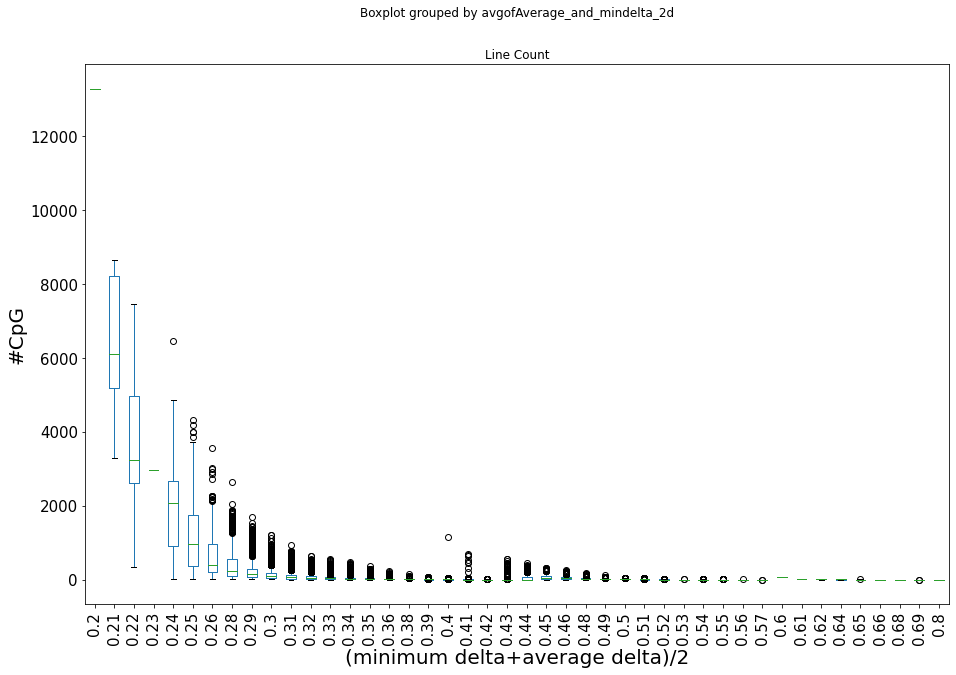

In [9]:
boxplot = inDF.boxplot(column=['Line Count'], by=['avgofAverage_and_mindelta_2d'],rot=90,grid=False,figsize=(15,10),fontsize=15)
boxplot.set_xlabel("(minimum delta+average delta)/2",fontsize=20)
boxplot.set_ylabel("#CpG",fontsize=20)

In [10]:
subset=inDF[inDF['Line Count']<=2000]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '#CpG')

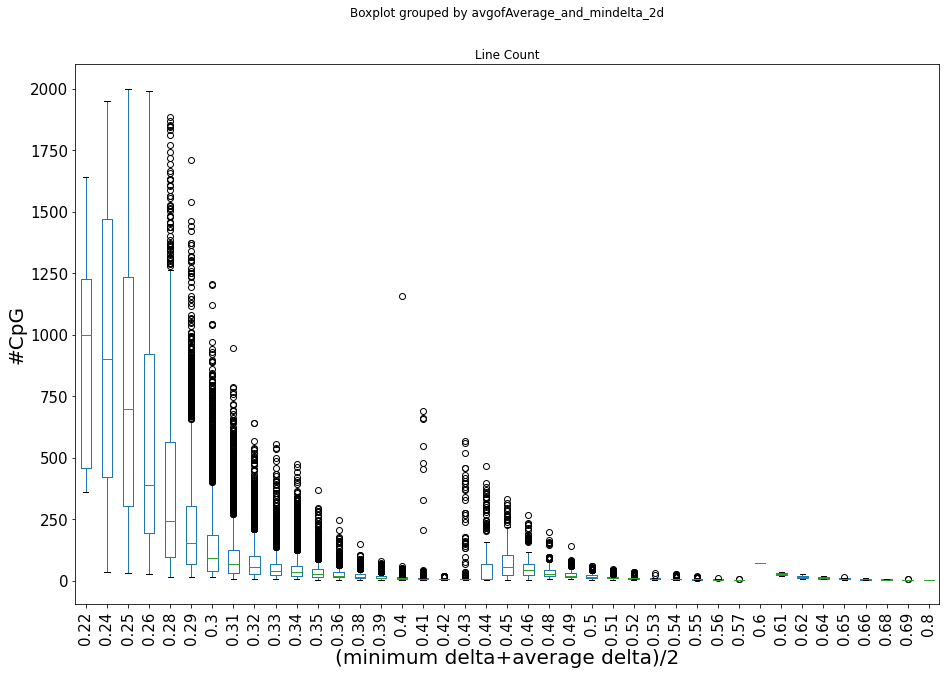

In [11]:
boxplot = subset.boxplot(column=['Line Count'], by=['avgofAverage_and_mindelta_2d'],rot=90,grid=False,figsize=(15,10),fontsize=15)
boxplot.set_xlabel("(minimum delta+average delta)/2",fontsize=20)
boxplot.set_ylabel("#CpG",fontsize=20)

In [12]:
inDF.to_csv(infile+"_forrankspace.txt",sep='\t',index=False)